ユニットの数:  {'A': 4, 'B': 3, 'C': 7, 'D': 7}
ユニットの合計:  21 最大と最小の差:  4


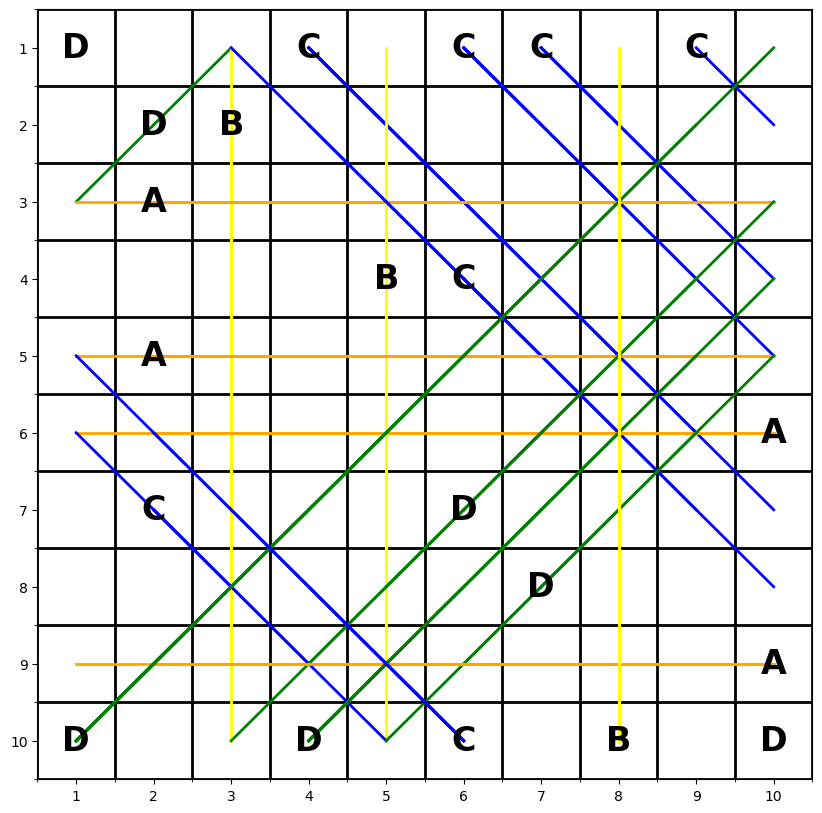

In [3]:
import random

def generate_individual():
    grid = np.zeros((GRID_SIZE, GRID_SIZE), dtype=int)
    unit_counts = {'A': 0, 'B': 0, 'C': 0, 'D': 0}
    while True:
        unit_type = np.random.choice(['A', 'B', 'C', 'D']) 
        unit_where = np.where((grid != 0) & (grid != 1))
        unit_coordinates = list(zip(unit_where[0], unit_where[1]))
        grid_copy = copy.deepcopy(grid)
        for unit_coordinate in unit_coordinates:
            grid_copy = replace_one(grid_copy, unit_coordinate, units[unit_type])
        zero_where = np.where(grid_copy == 0)
        if len(zero_where[0]) == 0:
            break
        else:
            coordinates = list(zip(zero_where[0], zero_where[1]))
            coordinate = coordinates[np.random.choice(len(coordinates))]
            grid[coordinate[0], coordinate[1]] = ord(unit_type)
            unit_counts[unit_type] += 1
            grid = replace_one(grid, coordinate, units[unit_type])
    return grid, unit_counts

def crossover(parent1, parent2):
    crossover_point = np.random.randint(0, GRID_SIZE)
    child1 = np.vstack((parent1[:crossover_point, :], parent2[crossover_point:, :]))
    child2 = np.vstack((parent2[:crossover_point, :], parent1[crossover_point:, :]))
    return repair(child1), repair(child2)

def mutate(grid):
    i, j = np.random.randint(0, GRID_SIZE, size=2)
    grid[i, j] = ord(np.random.choice(['A', 'B', 'C', 'D', '0']))
    return repair(grid)

def repair(grid):
    unit_counts = {'A': 0, 'B': 0, 'C': 0, 'D': 0}
    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            if grid[i, j] in range(65, 69):
                unit_type = chr(grid[i, j])
                if not is_valid_position(grid, (i, j), units[unit_type]):
                    grid[i, j] = 0
                else:
                    unit_counts[unit_type] += 1
    return grid, unit_counts

def is_valid_position(grid, coordinate, vectors):
    for vector in vectors:
        x, y = coordinate
        dx, dy = vector
        while 0 <= x + dx < grid.shape[0] and 0 <= y + dy < grid.shape[1]:
            x += dx
            y += dy
            if 0 <= x < grid.shape[0] and 0 <= y < grid.shape[1]:
                if grid[x, y] != 0:
                    return False
    return True

def genetic_algorithm(iterations=1000, population_size=100):
    population = [generate_individual() for _ in range(population_size)]
    for _ in range(iterations):
        population = sorted(population, key=lambda x: evaluate_grid(x[1]), reverse=True)
        new_population = population[:population_size//2]
        while len(new_population) < population_size:
            parents = random.sample(population[:population_size//2], 2)
            child1, child2 = crossover(parents[0][0], parents[1][0])
            new_population.append(child1)
            new_population.append(child2)
        population = new_population
    best_individual = max(population, key=lambda x: evaluate_grid(x[1]))
    return best_individual

if __name__ == "__main__":
    best_individual = genetic_algorithm()
    results(best_individual[1])
    plot_grid(best_individual[0], units, best_individual[1])
